In [1]:
from __future__ import print_function

import os, re
from sys import stdout
import pandas as pd
import numpy as np
import scipy.signal as signal
import scipy.optimize as optimize
import scipy.stats as st
from scipy.signal import butter, lfilter
from scipy.signal import freqz
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import set_random_seed
from numpy.random import seed
from scipy.stats import kurtosis
from keras import losses
%matplotlib notebook
from ipywidgets import IntProgress, Label
from keras import metrics as km
from sklearn import metrics, svm, tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Conv2D, MaxPooling2D, LSTM
import os, re
from sys import stdout, stderr
import pandas as pd
import numpy as np
import scipy.signal as signal
import scipy.optimize as optimize
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dropout
from scipy.stats import kurtosis

import tensorflow as tf
from keras import layers, Sequential, optimizers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.backend as K
import random as rn
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from time import sleep
import pickle

%matplotlib notebook
from ipywidgets import IntProgress, Label

last_stderr_length = 0
def stderr_overwrite(string):
    global last_stderr_length
    stderr.write("\r" +" "*last_stderr_length+"\r")
    stderr.write(string)
    last_stderr_length = len(string)

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
cache={}

In [3]:
#Functions

def findMeans(df):
    df = df[['accel_x', 'accel_y', 'accel_z']]
    df = df.mean()
    m = pd.DataFrame(
        data=[df], 
        columns=['accel_x', 'accel_y', 'accel_z']
    )
    m.columns = ['mean_x', 'mean_y', 'mean_z']
    return m

# SD accel_.
def findStd(df):
    df = df[['accel_x', 'accel_y', 'accel_z']]
    df = df.std()
    m = pd.DataFrame(
        data = [df], 
        columns = ['accel_x', 'accel_y', 'accel_z']
    )
    m.columns = ['std_x', 'std_y', 'std_z']
    return m

def findStdDiffs(df):
    df = df[['accel_x', 'accel_y', 'accel_z']]
    df = diffs(df.std())
    m = pd.DataFrame(
        data = [df], 
        columns = ['d1', 'd2', 'd3']
    )
    return m

def findDiffMeans(df):
    df = df[['accel_x', 'accel_y', 'accel_z']]
    means = df.mean()
    df = df - means
    df = df.mean()
    diffM = pd.DataFrame(
        data=[df], 
        columns=['accel_x', 'accel_y', 'accel_z']
    )
    diffM.columns = ['diff_means_x', 'diff_means_y', 'diff_means_z']
    return diffM

def get_mag_mean(df):
    return df.loc[:, ['accel_x', 'accel_y', 'accel_z']].apply(lambda x: np.linalg.norm(x), axis=1).mean()

def findMagMeans(df):
    df = df[['accel_x', 'accel_y', 'accel_z']]
    df = get_mag_mean(df)
    mag_means = pd.DataFrame(
        data=[df]
    )
    mag_means.columns = ['mag_mean']
    return mag_means

def toMin(df):
    df = df[['accel_x', 'accel_y', 'accel_z']]
    mini = df.min()
    mean = df.mean()
    tomin = pd.DataFrame(
        data=[mini - mean], 
        columns=['accel_x', 'accel_y', 'accel_z']
    )
    tomin.columns = ['min-mean_x', 'min-mean_y', 'min-mean_z']
    return tomin

def toMax(df):
    df = df[['accel_x', 'accel_y', 'accel_z']]
    maxi = df.max()
    mean = df.mean()
    tomax = pd.DataFrame(
        data=[maxi - mean],
        columns=['accel_x', 'accel_y', 'accel_z']
    )
    tomax.columns = ['max-mean_x', 'max-mean_y', 'max-mean_z']
    return tomax

def findMin(df):
    df = df[['accel_x', 'accel_y', 'accel_z']]
    mini = df.min()
    tomin = pd.DataFrame(
        data=[mini], 
        columns=['accel_x', 'accel_y', 'accel_z']
    )
    tomin.columns = ['min_x', 'min_y', 'min_z']
    return tomin

def findMax(df):
    df = df[['accel_x', 'accel_y', 'accel_z']]
    maxi = df.max()
    tomax = pd.DataFrame(
        data=[maxi],
        columns=['accel_x', 'accel_y', 'accel_z']
    )
    tomax.columns = ['max_x', 'max_y', 'max_z']
    return tomax

def rangea(df):
    df = df[['accel_x', 'accel_y', 'accel_z']]
    maxi = df.max()
    mini = df.min()
    rangea = pd.DataFrame(
        data=[maxi - mini], 
        columns=['accel_x', 'accel_y', 'accel_z']
    )
    rangea.columns = ['range_x', 'range_y', 'range_z']
#     print(rangea)
    return rangea

def skewa(df):
    df = df.loc[:,['accel_x', 'accel_y', 'accel_z']]
    s = pd.DataFrame(
        data=[df.skew()], 
        columns=['accel_x', 'accel_y', 'accel_z']
    )
    s.columns = ['skew_x', 'skew_y', 'skew_z']
    return s

def findMedians(df):
    df = df[['accel_x', 'accel_y', 'accel_z']]
    df = df.median()
    m = pd.DataFrame(
        data=[df], 
        columns=['accel_x', 'accel_y', 'accel_z']
    )
    m.columns = ['median_x', 'median_y', 'median_z']
    return m

def findKurtosis(df):
    df = df[['accel_x', 'accel_y', 'accel_z']]
    df = kurtosis(df)
    m = pd.DataFrame(
        data=[df], 
        columns=['accel_x', 'accel_y', 'accel_z']
    )
    m.columns = ['kurtosis_x', 'kurtosis_y', 'kurtosis_z']
    return m

def findQuantiles(df, perc):
    df = df[['accel_x', 'accel_y', 'accel_z']]
    df = df.quantile(perc)
    m = pd.DataFrame(
        data=[df], 
        columns=['accel_x', 'accel_y', 'accel_z']
    )
    m.columns = [str(perc) + 'quant_x', str(perc) + 'quant_y', str(perc) + 'quant_z']
    return m

def findMeanCrossCount(df):
    df = df[['accel_x', 'accel_y', 'accel_z']]
    list_count = []
    peak_list = []
    means = df.mean()
    for r in ['accel_x', 'accel_y', 'accel_z']:
        peak_list = []
        for i, value in enumerate(df[r]):
            if i < 1:
                continue
            if value <= means[r] and df[r].iloc[i-1] >=means[r]:
                peak_list.append(i)
            elif value >= means[r] and df[r].iloc[i-1] <= means[r]:
                peak_list.append(i)
        list_count.append(len(peak_list))
    m = pd.DataFrame(
                data=[list_count], 
                columns=['accel_x', 'accel_y', 'accel_z']
    )
    m.columns = ['quant_x', 'quant_y', 'quant_z']
    return m

def findMagPeaks(df):
    df = df[['accel_x', 'accel_y', 'accel_z']]
    mag = df.loc[:, ['accel_x', 'accel_y', 'accel_z']].apply(lambda x: np.linalg.norm(x), axis=1)
    peaks, _ = signal.find_peaks(mag)
    peaks_x, _ = signal.find_peaks(df['accel_x'])
    peaks_y, _ = signal.find_peaks(df['accel_y'])
    peaks_z, _ = signal.find_peaks(df['accel_z'])
    m = pd.DataFrame(
        data=[len(peaks), len(peaks_x), len(peaks_y), len(peaks_z)]
    )
    m = m.T
    m.columns = ['mag_peaks', 'peaks_x', 'peaks_y', 'peaks_z']
    m.reset_index(drop=True)
    return m
def findLength(df):
    df = df.shape[0]
    m = pd.DataFrame(
        data=[df]
    )
    m.columns = ['length']
    return m

def findLengthRatio(df, df1):
    df = df.shape[0]
    df1 = df1.shape[0]
    m = pd.DataFrame(
        data=[df/df1]
    )
    m.columns = ['lengthRatio']
    return m

In [4]:
cache = {}

In [6]:
with open('cache.pickle', 'wb') as f:
    pickle.dump(cache, f, pickle.HIGHEST_PROTOCOL)

In [4]:
with open('cache.pickle', 'rb') as f:
    global cache
    cache = pickle.load(f)

In [4]:
classIndices = {"normal":0, "obstructed":1}

# Getting the features and appending to the main "features" dataframe
def getFeatures(df):
    features = []
    features.append(findMeans(df))
    features.append(findStd(df))
    features.append(findDiffMeans(df))
    features.append(findMagMeans(df))
    features.append(toMax(df))
    features.append(toMin(df))
    features.append(findMax(df))
    features.append(findMin(df))
    features.append(rangea(df))
    features.append(skewa(df))
    features.append(findMedians(df))
    features.append(findKurtosis(df))
    features.append(findQuantiles(df, 0.1).reset_index(drop=True)) 
    features.append(findQuantiles(df, 0.9).reset_index(drop=True))
    features.append(findQuantiles(df, 0.25).reset_index(drop=True))
    features.append(findQuantiles(df, 0.75).reset_index(drop=True)) 
    features.append(findMeanCrossCount(df))
    features.append(findMagPeaks(df))
    features.append(findLength(df))
    all_features = pd.concat(features, axis=1, sort=False)
#     print (all_features)
    return all_features

def load_from_cache(filename, features, Y):
    cache_features, cache_y = cache[filename]
    for i in range(len(cache_features)):
        features.append(cache_features[i]) 
    Y += cache_y
#     print("Loaded {} from cache".format(filename))
    return features, Y

def butter_bandpass(lowcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = butter(order, low)
    return b, a


def butter_bandpass_filter(data, lowcut, fs, order=5):
    b, a = butter_bandpass(lowcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def load_data_from_csv_in_dir(path, files=None, plot=False):
    accel_all, start_ind_all, end_ind_all, Y, end_ind_all, features_all, features_all_exp, can_all = [], [], [], [], [], [], [], []
    patients = []
    count = 0
    if files is None:
        files = os.listdir(path)
    for i, file in enumerate(files):
        stderr_overwrite("Getting data from {}{} | {}/{}".format(path, file, i+1, len(files)))
        if (file[-4:] == ".csv"):
        
            cache_features = []
            cache_y = []
            df = pd.read_csv(path + file)
            patient = int(re.findall(r'\d+', file)[0])
            patients.append(patient)
            if patient != 1:
                continue
            if plot==True:
                count += 1
                plt.figure(count)
                plt.title("Patient %d" % patient)
                plt.tight_layout()
       
            start, end, obstr, normal = df["14 Memory"].values, df["15 Memory"].values, df["17 Memory"].values, df["16 Memory"].values
            start_ind = np.where(start == 1)[0]
            end_ind = np.where(end == 1)[0]
            accel = df[['accel_x', 'accel_y','accel_z']]/-16384
            accel['accel_z'] = accel['accel_z']+0.8
            
            # Sample rate and desired cutoff frequencies (in Hz).
#             fs = 35.0
#             lowcut = 0.2

#             # Filter a noisy signal.
#             T = 0.05
#         #     nsamples = T * fs
#         #     t = np.linspace(0, T, nsamples, endpoint=False)
#             a = 0.02
#             f0 = 600.0
#             x = accel
#             t = np.arange(x.shape[0])
#         #     plt.figure(2)
#         #     plt.clf()
#         #     plt.plot(t, x, label='Noisy signal')

#             y = butter_bandpass_filter(x, lowcut, fs, order=6)
#             accel = y
#             plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
#             plt.xlabel('time (seconds)')
# #             plt.hlines([-a, a], 0, T, linestyles='--')
#             plt.grid(True)
#             plt.axis('tight')
#             plt.legend(loc='upper left')
#             accel = pd.DataFrame({'accel_x':accel[:,0],'accel_y':accel[:,1],'accel_z':accel[:,2]})
#             accel = accel.rolling(5).mean()
#             accel = accel.iloc[4:].reset_index(drop=True)
            can = df["Cannula"]
            can = ((can - can.min())/(can.max()-can.min()))*(5.0-(-0.1))+(-0.1)
#             accel = accel.iloc[start_ind[0]:]#.reset_index(drop=True)
            
            accel_pat, Y_pat, features_pat, features_pat_exp, can_pat = [], [], [], [], []
#             if (str(file)) in cache:
#                 ft, y = load_from_cache(str(file), features_pat, Y)
#                 features_all.append(ft)
#                 Y.append(y)
#                 continue
#             for i in range(len(start_ind) - 1):
#                 pre_breath = 0 if start_ind[i] < 5 else start_ind[i] - 5
# #                 post_breath = len(start) if start_ind[i] >= len(start) -17 else start_ind[i] + 17
#                 post_breath = start_ind[i+1]-10
#                 if(len(accel.iloc[start_ind[i]:start_ind[i+1]]) <= 200):
#                     if (sum(obstr[pre_breath:post_breath]) >= 1 and accel.iloc[start_ind[i]:start_ind[i+1]+1].isnull().values.any() == False):
#                         Y_pat.append(1)
#                         cache_y.append(1)
#                         if plot==True:
#                             plt.plot(accel.iloc[start_ind[i]:start_ind[i+1]+1], '-r')
#                         cache_features.append(getFeatures(accel.iloc[start_ind[i]:start_ind[i+1]]))
#                         features_pat.append(getFeatures(accel.iloc[start_ind[i]:start_ind[i+1]]))
#     #                     features_pat.append(getFeatures(accel.iloc[start_ind[i]:start_ind[i+1]]))
#                     elif (sum(normal[pre_breath:post_breath]) >= 1 and accel.iloc[start_ind[i]:start_ind[i+1]+1].isnull().values.any() == False):
#                         Y_pat.append(0)
#                         cache_y.append(0)
#                         if plot==True:
#                             plt.plot(accel.iloc[start_ind[i]:start_ind[i+1]+1], '-g')
#                         cache_features.append(getFeatures(accel.iloc[start_ind[i]:start_ind[i+1]]))
#                         accel_pat.append(accel.iloc[start_ind[i]:start_ind[i+1]])
#                         features_pat.append(getFeatures(accel.iloc[start_ind[i]:start_ind[i+1]]))
# #     #                     features_pat.append(getFeatures(accel.iloc[start_ind[i]:start_ind[i+1]]))
# #                     elif (accel.iloc[start_ind[i]:start_ind[i+1]+1].isnull().values.any() == False):
# #                         Y_pat.append(2)
# #                         cache_y.append(2)
# #                         if plot==True:
# #                             plt.plot(accel.iloc[start_ind[i]:start_ind[i+1]+1], '-b')
# #                         cache_features.append(getFeatures(accel.iloc[start_ind[i]:start_ind[i+1]]))
# #                         accel_pat.append(accel.iloc[start_ind[i]:start_ind[i+1]])
# #                         features_pat.append(getFeatures(accel.iloc[start_ind[i]:start_ind[i+1]]))
            #Inspirations
            e = 0
            for i in range(len(start_ind) - 1):
                if(start_ind[i] > end_ind[e]): e += 1
                if(start_ind[i+1] < end_ind[e]): e -= 1
          
                if (start_ind[i] != end_ind[e]):
#                     pre_breath = 0 if start_ind[i] < 5 else start_ind[i] - 5
                    pre_breath=start_ind[i]
                    post_breath = end_ind[e]
#                     post_breath = len(start) if start_ind[i] >= len(start) -17 else start_ind[i] + 17
        #             plt.plot(accel.iloc[start_ind[i]:end_ind[e]+1])
                    if(len(accel.iloc[start_ind[i]:start_ind[i+1]]) <= 200):
#                         accel_pat.append(accel[start_ind[i]:end_ind[e]+1])
#                         test.append(accel.iloc[start_ind[i]:start_ind[i+1]].values.tolist())
                        if (sum(obstr[pre_breath:post_breath]) >= 1):
                            can_pat.append(can[start_ind[i]:start_ind[i+1]])
                            accel_pat.append(accel[start_ind[i]:start_ind[i+1]])
                            #Insp
                            features = getFeatures(accel.iloc[start_ind[i]:end_ind[e]+1])
                            length_ratio = findLengthRatio(accel.iloc[start_ind[i]:end_ind[e]+1], accel.iloc[end_ind[e]:start_ind[i+1]+1])
                            features = pd.concat([features, length_ratio], axis=1)
                            features_pat.append(features)
                            #Exp
                            features_pat_exp.append(getFeatures(accel.iloc[end_ind[e]:start_ind[i+1]+1]))
                            plt.plot(can.iloc[start_ind[i]:start_ind[i+1]], '-r')
                            plt.plot(accel.iloc[start_ind[i]:end_ind[e]+1], '-r')
#                             plt.plot(can.iloc[start_ind[i]:start_ind[i+1]+1], '-r')
                            Y_pat.append(1)
                        elif (sum(normal[pre_breath:post_breath]) >= 1):
                            can_pat.append(can[start_ind[i]:start_ind[i+1]])
                            accel_pat.append(accel[start_ind[i]:start_ind[i+1]])
                            features = getFeatures(accel.iloc[start_ind[i]:end_ind[e]+1])
                            length_ratio = findLengthRatio(accel.iloc[start_ind[i]:end_ind[e]+1], accel.iloc[end_ind[e]:start_ind[i+1]+1])
                            features = pd.concat([features, length_ratio], axis=1)
                            features_pat.append(features)
                            plt.plot(can.iloc[start_ind[i]:start_ind[i+1]], '-g')
                            #Exp
                            features_pat_exp.append(getFeatures(accel.iloc[end_ind[e]:start_ind[i+1]+1]))
                        
                            plt.plot(accel.iloc[start_ind[i]:end_ind[e]+1], '-g')
#                             plt.plot(can.iloc[start_ind[i]:start_ind[i+1]+1], '-g')
                            Y_pat.append(0)
                e += 1
            
            cache[str(file)] = (cache_features, cache_y) 
            start_ind_all.append(start_ind)
            end_ind_all.append(end_ind)
            accel_all.append(accel_pat)
            Y.append(Y_pat)
            can_all.append(can_pat)
            insp = pd.concat(features_pat, ignore_index=True)
            exp = pd.concat(features_pat_exp, ignore_index=True)
            exp.columns = [str(col) + '_exp' for col in exp.columns]
#             features_all.append(pd.concat(features_pat, ignore_index=True))
            features_all.append(pd.concat([insp, exp], axis=1))
            print(len(end_ind))
    return features_all, Y , accel_all, can_all

# X, Y = load_data_from_csv_in_dir("../pdiot2018-data/")
# X_train, y_train = load_data_from_csv_in_dir("Data/clean/train/")
# y_train_i = np.array([classIndices[x] for x in y_train])
# X_valid, y_valid = load_data_from_csv_in_dir("Data/clean/valid/")
# y_valid_i = np.array([classIndices[x] for x in y_valid])


Getting data from ./Final/1one.csv | 1/9

1429


Getting data from ./Final/pat_8_processed_shifted.csv | 9/9 

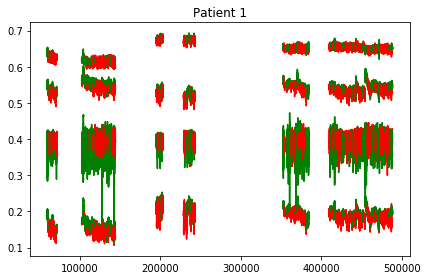

In [5]:
X, Y, accel, can = load_data_from_csv_in_dir("./Final/", plot=True)

In [6]:
print("Number of normal breaths: " + str(len(np.where(np.array(Y[0])==0)[0])))
print("Number of obstructed breaths: " + str(len(np.where(np.array(Y[0])==1)[0])))

Number of normal breaths: 505
Number of obstructed breaths: 901


In [7]:
X_all = pd.DataFrame()
y_all = []
for pat in range(len(X)):
    for l in range(len(X[pat])):
        X_all = X_all.append(X[pat].loc[l])
        y_all.append(Y[pat][l])
# print(np.asarray(y_all))
# print(X_all.join(y_all))
X_all['y'] = np.asarray(y_all)

In [16]:
import random
X_set =  X_all.loc[:, X_all.columns != 'y']
Y_set = X_all['y']
# print(len(Y[1]))
# print (len(X[1]))
# X_train, X_valid, y_train, y_valid = train_test_split(X_set, Y_set, test_size=0.3, stratify=Y_set, random_state=4567, shuffle=True) 

# X_all = X_all.sample(frac=1)

# X_ind, y_ind = zip(*c)
# X_train = X_all.loc[:, X_all.columns != 'y']
# X_valid = X[-1]
# y_train = X_all.loc[:, 'y']
# y_valid = Y[-1]
cut = round(X_set.shape[0] * 0.8)
X_train, y_train, X_valid, y_valid = X_set.iloc[0:cut, :], Y_set[0:cut], X_set.iloc[cut:, :], Y_set[cut:]
print(len(X_train))
print(len(y_train))
print(len(X_valid))
print(len(y_valid))

1125
1125
281
281


In [28]:
print ("\n ---------Decision Tree----------")
folds = 5
SEED=6384
for i in range(2,40):
    dt_model = tree.DecisionTreeClassifier(max_depth = i, random_state=SEED)
#     dt_model.fit(X_train,y_train)
#     y_train_predict = dt_model.predict(X_train)
#     y_valid_predict = dt_model.predict(X_valid)
    score_val_valid = cross_val_score(dt_model, X_set, Y_set, cv=folds)
    print ("\n Depth: %d" % i)
#     print("Training accuracy score with Decision Tree: %0.2f" % metrics.accuracy_score(y_train_predict, y_train))
#     print("Validation accuracy score with Decision Tree: %0.2f" % metrics.accuracy_score(y_valid_predict, y_valid))
    print("Cross-validation accuracy score with Decision Tree: %0.2f" % score_val_valid.mean())
#     print("Metrics:")
#     print(classification_report(y_valid_predict, y_valid))
#     print("Confusion matrix: ")
#     print(pd.DataFrame(confusion_matrix(y_valid, y_valid_predict), index=['0', '1'], columns=['0','1']))



 ---------Decision Tree----------

 Depth: 2
Cross-validation accuracy score with Decision Tree: 0.78

 Depth: 3
Cross-validation accuracy score with Decision Tree: 0.70

 Depth: 4
Cross-validation accuracy score with Decision Tree: 0.74

 Depth: 5
Cross-validation accuracy score with Decision Tree: 0.74

 Depth: 6
Cross-validation accuracy score with Decision Tree: 0.73

 Depth: 7
Cross-validation accuracy score with Decision Tree: 0.70

 Depth: 8
Cross-validation accuracy score with Decision Tree: 0.72

 Depth: 9
Cross-validation accuracy score with Decision Tree: 0.73

 Depth: 10
Cross-validation accuracy score with Decision Tree: 0.72

 Depth: 11
Cross-validation accuracy score with Decision Tree: 0.69

 Depth: 12
Cross-validation accuracy score with Decision Tree: 0.69

 Depth: 13
Cross-validation accuracy score with Decision Tree: 0.69

 Depth: 14
Cross-validation accuracy score with Decision Tree: 0.69

 Depth: 15
Cross-validation accuracy score with Decision Tree: 0.69


KeyboardInterrupt: 

In [26]:
print ("\n --------------KNN---------------")
for i in range(2,50):
    KNN_model = KNeighborsClassifier(n_neighbors = i)
#     KNN_model.fit(X_train,y_train)
#     y_train_predict = KNN_model.predict(X_train)
#     y_valid_predict = KNN_model.predict(X_valid)
    score_val_valid = cross_val_score(KNN_model, X_set, Y_set, cv=folds)
    print ("\n No of neighbors: %d" % i)
#     print("Training accuracy score with KNN:: %0.2f" % metrics.accuracy_score(y_train_predict, y_train))
#     print("Validation accuracy score with KNN: %0.2f" % metrics.accuracy_score(y_valid_predict, y_valid))
    print("Cross-validation accuracy score with KNN: %0.2f" % score_val_valid.mean())
#     print("Metrics:")
#     print(classification_report(y_valid, y_valid_predict))
#     print("Confusion matrix: ")
#     print(pd.DataFrame(confusion_matrix(y_valid, y_valid_predict), index=['asc', 'des', 'run', 'wal'], columns=['asc', 'des', 'run', 'wal']))



 --------------KNN---------------

 No of neighbors: 2
Cross-validation accuracy score with KNN: 0.67

 No of neighbors: 3
Cross-validation accuracy score with KNN: 0.72

 No of neighbors: 4
Cross-validation accuracy score with KNN: 0.70

 No of neighbors: 5
Cross-validation accuracy score with KNN: 0.72

 No of neighbors: 6
Cross-validation accuracy score with KNN: 0.71

 No of neighbors: 7
Cross-validation accuracy score with KNN: 0.72

 No of neighbors: 8
Cross-validation accuracy score with KNN: 0.71

 No of neighbors: 9
Cross-validation accuracy score with KNN: 0.73

 No of neighbors: 10
Cross-validation accuracy score with KNN: 0.73

 No of neighbors: 11
Cross-validation accuracy score with KNN: 0.72

 No of neighbors: 12
Cross-validation accuracy score with KNN: 0.73

 No of neighbors: 13
Cross-validation accuracy score with KNN: 0.73

 No of neighbors: 14
Cross-validation accuracy score with KNN: 0.74

 No of neighbors: 15
Cross-validation accuracy score with KNN: 0.73

 No of

KeyboardInterrupt: 

In [29]:
print ("\n ---------------Linear SVM-----------------")
svm_model = svm.LinearSVC(random_state=SEED)
svm_model.fit(X_train, y_train)
# y_train_predict = svm_model.predict(X_train)
# y_valid_predict = svm_model.predict(X_valid)
# print("Training accuracy score with Linear SVM: %0.2f" % metrics.accuracy_score(y_train_predict, y_train))
# print("Validation accuracy score with Linear SVM: %0.2f" % metrics.accuracy_score(y_valid_predict, y_valid))
# print("Metrics:")
# print(classification_report(y_valid, y_valid_predict))
score_val_valid = cross_val_score(svm_model, X_set, Y_set, cv=5)
print("CV score:")
print(np.mean(score_val_valid))


 ---------------Linear SVM-----------------
CV score:
0.734070316246435


In [31]:
print ("\n -----------Random Forest----------")
n_trees = [100, 120, 140, 200, 300, 500]
for i in range(2,20):
    for j in n_trees:
        rf_model = RandomForestClassifier(n_estimators=j, max_depth=i,random_state=SEED)
#         rf_model.fit(X_train, y_train)
#         y_train_predict = rf_model.predict(X_train)
#         y_valid_predict = rf_model.predict(X_valid)
        print ("Depth: %d, number of trees: %d" % (i,j))
#         print("Training accuracy score with Random Forest: %0.2f" % metrics.accuracy_score(y_train_predict, y_train))
#         print("Validation accuracy score with Random Forest: %0.2f" % metrics.accuracy_score(y_valid_predict, y_valid))
#         print("Confusion matrix: ")
#         print(pd.DataFrame(confusion_matrix(y_valid, y_valid_predict), index=['asc', 'des', 'run', 'wal'], columns=['asc', 'des', 'run', 'wal']))

        score_val_valid = cross_val_score(rf_model, X_set, Y_set, cv=5)
        print("CV score:")
        print(np.mean(score_val_valid))
#         print("Metrics:")
#         print(classification_report(y_valid, y_valid_predict))


 -----------Random Forest----------
Depth: 2, number of trees: 100
CV score:
0.7304232603922163
Depth: 2, number of trees: 120
CV score:
0.7240251381842963
Depth: 2, number of trees: 140
CV score:
0.7197597233790162
Depth: 2, number of trees: 200
CV score:
0.721900002523914
Depth: 2, number of trees: 300
CV score:
0.7183412836627042
Depth: 2, number of trees: 500
CV score:
0.7211857348375862
Depth: 3, number of trees: 100
CV score:
0.7467908432396961
Depth: 3, number of trees: 120
CV score:
0.7475000630978521
Depth: 3, number of trees: 140
CV score:
0.7410994169758462
Depth: 3, number of trees: 200
CV score:
0.748931122384594
Depth: 3, number of trees: 300
CV score:
0.7460816233815402
Depth: 3, number of trees: 500
CV score:
0.7439438681507282
Depth: 4, number of trees: 100
CV score:
0.7538981853057722
Depth: 4, number of trees: 120
CV score:
0.750349562100906
Depth: 4, number of trees: 140
CV score:
0.753194013275788
Depth: 4, number of trees: 200
CV score:
0.7560435122788421
Depth: 

KeyboardInterrupt: 